In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_json('user_log.json')

In [3]:
data2=pd.read_json('session.json')

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260312 entries, 0 to 260311
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UserLogID          260312 non-null  int64  
 1   SessionID          260312 non-null  object 
 2   StopTime           260312 non-null  object 
 3   StartTime          260312 non-null  object 
 4   Duration           260312 non-null  float64
 5   ContentAction      260312 non-null  object 
 6   ContentDetail      260312 non-null  object 
 7   ActionCode         260312 non-null  int64  
 8   Action             260312 non-null  object 
 9   ActionDetail       260312 non-null  object 
 10  ContentActionCode  260312 non-null  int64  
 11  ContentDetailCode  260312 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 23.8+ MB


In [ ]:
#backup

In [5]:
df_user_log=data1.copy()

In [6]:
df_session_data=data2.copy()

In [ ]:
#converting time unit

In [7]:
df_user_log[['StopTime']] =  df_user_log[['StopTime']].apply(pd.to_datetime)

In [8]:
df_user_log[['StartTime']] =  df_user_log[['StartTime']].apply(pd.to_datetime)

In [9]:
df_session_data[['recordDate']] =  df_session_data[['recordDate']].apply(pd.to_datetime)

In [ ]:
#how to rename a column

In [10]:
df_session_data.rename(columns={'sessionID': 'SessionID'}, inplace=True)

In [ ]:
#join operation

In [11]:

df_merge_col = pd.merge(df_user_log, df_session_data, how="inner", on=["SessionID", "SessionID"])

In [ ]:
# drop duplicates

In [12]:
df_merge_col=df_merge_col.drop_duplicates()

In [13]:
df_merge_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245577 entries, 0 to 491152
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   UserLogID            245577 non-null  int64         
 1   SessionID            245577 non-null  object        
 2   StopTime             245577 non-null  datetime64[ns]
 3   StartTime            245577 non-null  datetime64[ns]
 4   Duration             245577 non-null  float64       
 5   ContentAction        245577 non-null  object        
 6   ContentDetail        245577 non-null  object        
 7   ActionCode           245577 non-null  int64         
 8   Action               245577 non-null  object        
 9   ActionDetail         245577 non-null  object        
 10  ContentActionCode    245577 non-null  int64         
 11  ContentDetailCode    245577 non-null  int64         
 12  appID                245577 non-null  int64         
 13  recordDate    

In [14]:
df_merge_col=df_merge_col.reset_index(drop=True)

In [ ]:
#backup

In [15]:
df_comp=df_merge_col.reset_index(drop=True)

In [16]:
df_merge_col.isnull().sum()

UserLogID              0
SessionID              0
StopTime               0
StartTime              0
Duration               0
ContentAction          0
ContentDetail          0
ActionCode             0
Action                 0
ActionDetail           0
ContentActionCode      0
ContentDetailCode      0
appID                  0
recordDate             0
deviceType             0
deviceSystemVersion    0
deviceUDID             0
deviceName             0
isSessionFinished      0
appVersion             0
durationInSeconds      0
dtype: int64

action code icinde '    ' bos deger yerine parantez ile aralik girilmistir, label encoding ile modele 
eklenecek

In [17]:
df_merge_col.head().T

,0,1,2,3,4
UserLogID,69234277,69234288,69234296,69234311,69234315
SessionID,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3
StopTime,2015-01-11 21:01:47,2015-01-11 21:01:47,2015-01-11 21:01:48,2015-01-11 21:01:48,2015-01-11 21:01:48
StartTime,2015-01-11 20:59:39,2015-01-11 20:59:39,2015-01-11 21:00:18,2015-01-11 20:59:44,2015-01-11 21:00:18
Duration,0.056658,0.029212,39.22049,5.320609,39.241505
ContentAction,UIApplicationLocationDidChange,FECLAuthorizationStatusChanged,Photo Selected,Gallery View,Table View
ContentDetail,Lat : 40.222765 / Lng : 40.222765,Authorized Always,Jessica Alba 2 cocuk annesi olmasina ragmen Me...,PageView,Jessica Alba 2 cocuk annesi olmasina ragmen Me...
ActionCode,7000,7001,1000,8000,9000
Action,,,,,UI Actions
ActionDetail,,,,,Row Selected


In [18]:
df_merge_col['UserLogID'].value_counts().sum()

245577

In [ ]:
#creating new features

In [19]:
df_merge_col['logID_freq_of_every_session']=df_merge_col.groupby('SessionID')["UserLogID"].transform('nunique')

In [20]:
df_merge_col['logID_freq_of_every_device']=df_merge_col.groupby('deviceUDID')["UserLogID"].transform('nunique')

In [21]:
df_merge_col['logID_totalduration_of_every_device']=df_merge_col.groupby(["deviceUDID"])['Duration'].transform('sum')

In [22]:
df_merge_col['logID_averageduration_of_every_device']=df_merge_col.groupby(["deviceUDID"])['Duration'].transform('mean')

In [23]:
df_merge_col['sessionID_freq_of_every_device']=df_merge_col.groupby('deviceUDID')["SessionID"].transform('nunique')

In [24]:
df_merge_col['Session_Duration_totalduration_of_every_device']=df_merge_col.groupby(["deviceUDID"])['durationInSeconds'].transform('sum')

In [25]:



df_merge_col['Session_Duration_averageduration_of_every_device']=df_merge_col.groupby(["deviceUDID"])['durationInSeconds'].transform('mean')

In [26]:
df_merge_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245577 entries, 0 to 245576
Data columns (total 28 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   UserLogID                                         245577 non-null  int64         
 1   SessionID                                         245577 non-null  object        
 2   StopTime                                          245577 non-null  datetime64[ns]
 3   StartTime                                         245577 non-null  datetime64[ns]
 4   Duration                                          245577 non-null  float64       
 5   ContentAction                                     245577 non-null  object        
 6   ContentDetail                                     245577 non-null  object        
 7   ActionCode                                        245577 non-null  int64         
 8   Action        

In [27]:
#backup , again :)
df_merge_col2=df_merge_col.copy()

In [ ]:
#convert to string

In [28]:
df_merge_col2['deviceType']= df_merge_col2['deviceType'].apply(str)
df_merge_col2['isSessionFinished']= df_merge_col2['isSessionFinished'].apply(str)

In [ ]:
#drop some of them

In [29]:
df_merge_col2 = df_merge_col2.drop('Session_Duration_totalduration_of_every_device', 1)
df_merge_col2 = df_merge_col2.drop('logID_totalduration_of_every_device', 1)
df_merge_col2 = df_merge_col2.drop('appID', 1)



/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/514205712.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('Session_Duration_totalduration_of_every_device', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/514205712.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('logID_totalduration_of_every_device', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/514205712.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('appID', 1)


In [30]:
df_merge_col2 = df_merge_col2.drop('StopTime', 1)
df_merge_col2 = df_merge_col2.drop('StartTime', 1)
df_merge_col2 = df_merge_col2.drop('recordDate', 1)

/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/3176369590.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('StopTime', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/3176369590.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('StartTime', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/3176369590.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('recordDate', 1)


In [31]:
df_merge_col2 = df_merge_col2.drop('deviceSystemVersion', 1)
df_merge_col2 = df_merge_col2.drop('deviceName', 1)
df_merge_col2 = df_merge_col2.drop('appVersion', 1)

/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/3280245039.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('deviceSystemVersion', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/3280245039.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('deviceName', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/3280245039.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('appVersion', 1)


In [32]:
df_merge_col2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245577 entries, 0 to 245576
Data columns (total 19 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   UserLogID                                         245577 non-null  int64  
 1   SessionID                                         245577 non-null  object 
 2   Duration                                          245577 non-null  float64
 3   ContentAction                                     245577 non-null  object 
 4   ContentDetail                                     245577 non-null  object 
 5   ActionCode                                        245577 non-null  int64  
 6   Action                                            245577 non-null  object 
 7   ActionDetail                                      245577 non-null  object 
 8   ContentActionCode                                 245577 non-null  int64  
 9   Cont

In [34]:
df_merge_col2 = df_merge_col2.drop('UserLogID', 1)
df_merge_col2 = df_merge_col2.drop('ContentDetailCode', 1)
df_merge_col2 = df_merge_col2.drop('ContentActionCode', 1)

/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/1950125292.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('UserLogID', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/1950125292.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('ContentDetailCode', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/1950125292.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('ContentActionCode', 1)


In [ ]:
#label encoding 

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label=le.fit_transform(df_merge_col2['SessionID'])
df_merge_col2['SessionID']=label
label=le.fit_transform(df_merge_col2['ContentDetail'])
df_merge_col2['ContentDetail']=label
label=le.fit_transform(df_merge_col2['SessionID'])
df_merge_col2['SessionID']=label
label=le.fit_transform(df_merge_col2['ContentAction'])
df_merge_col2['ContentAction']=label

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [38]:
label=le.fit_transform(df_merge_col2['SessionID'])
df_merge_col2['SessionID']=label

In [39]:
label=le.fit_transform(df_merge_col2['ContentDetail'])
df_merge_col2['ContentDetail']=label

In [40]:
label=le.fit_transform(df_merge_col2['SessionID'])
df_merge_col2['SessionID']=label

In [41]:
label=le.fit_transform(df_merge_col2['ContentAction'])
df_merge_col2['ContentAction']=label

In [42]:


label=le.fit_transform(df_merge_col2['Action'])
df_merge_col2['Action']=label

In [43]:
label=le.fit_transform(df_merge_col2['ActionDetail'])
df_merge_col2['ActionDetail']=label

In [44]:

label=le.fit_transform(df_merge_col2['deviceUDID'])
df_merge_col2['deviceUDID']=label

In [45]:
df_merge_col2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245577 entries, 0 to 245576
Data columns (total 16 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   SessionID                                         245577 non-null  int64  
 1   Duration                                          245577 non-null  float64
 2   ContentAction                                     245577 non-null  int64  
 3   ContentDetail                                     245577 non-null  int64  
 4   ActionCode                                        245577 non-null  int64  
 5   Action                                            245577 non-null  int64  
 6   ActionDetail                                      245577 non-null  int64  
 7   deviceType                                        245577 non-null  object 
 8   deviceUDID                                        245577 non-null  int64  
 9   isSe

In [ ]:
#standard scaling and outlier determination usgin dbscan

In [46]:
from sklearn.preprocessing import StandardScaler
dfm2 = StandardScaler().fit_transform(df_merge_col2)

In [47]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [48]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(dfm2)
distances, indices = neighbors_fit.kneighbors(dfm2)

In [49]:
distances = np.sort(distances, axis=0)




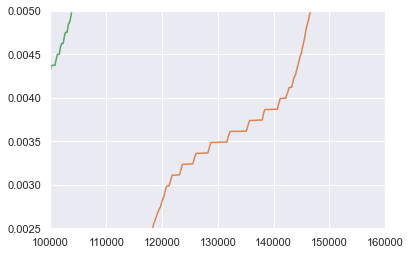

In [50]:
plt.ylim(0.0025, 0.005)
plt.xlim(100000, 160000)
plt.plot(distances)

In [51]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [52]:
DBS =DBSCAN(eps=0.004,min_samples=800)
DBS.fit(dfm2)

DBSCAN(eps=0.004, min_samples=800)

In [53]:
labels=DBS.labels_

In [54]:
labels

array([-1, -1, -1, ..., -1, -1, -1])

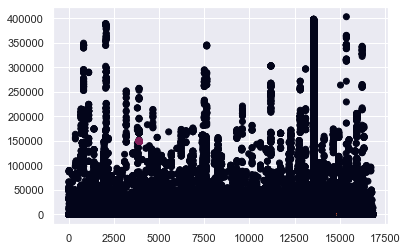

In [55]:
plt.scatter(df_merge_col2.iloc[:,0],df_merge_col2.iloc[:,1],c=labels)
plt.show()

In [56]:
df_cluster_firstimp = pd.DataFrame(labels)

In [57]:
add_deviceUDID=df_merge_col["deviceUDID"]
df_cluster_firstimp=df_cluster_firstimp.join(add_deviceUDID)

In [58]:
df_cluster_firstimp.rename(columns={0: 'clusterno'}, inplace=True)

In [59]:
add_deviceUDID=df_merge_col["UserLogID"]
df_cluster_firstimp=df_cluster_firstimp.join(add_deviceUDID)

In [60]:
df_cluster_firstimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245577 entries, 0 to 245576
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clusterno   245577 non-null  int64 
 1   deviceUDID  245577 non-null  object
 2   UserLogID   245577 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.6+ MB


In [61]:
df_cluster_firstimp['UserLogID'].value_counts().sum()

245577

Text(0.5, 0, 'deviceUDID')

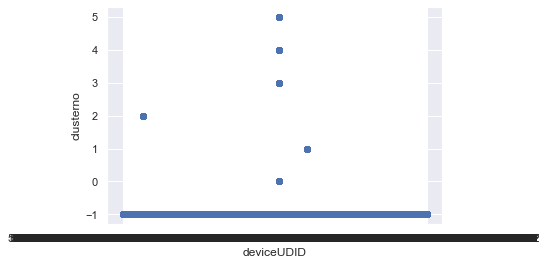

In [62]:
plt.scatter(y=df_cluster_firstimp['clusterno'], x=df_cluster_firstimp['deviceUDID'])
plt.ylabel('clusterno')
plt.xlabel('deviceUDID')

In [63]:
df_cluster_firstimp['clusterno'].value_counts().head(20)

-1    236647
 2      2994
 3      1400
 5      1304
 4      1221
 1      1118
 0       893
Name: clusterno, dtype: int64

In [64]:
df_cluster_firstimp = df_cluster_firstimp.drop('deviceUDID', 1)

/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/3752336414.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_cluster_firstimp = df_cluster_firstimp.drop('deviceUDID', 1)


In [65]:
df_cluster_firstimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245577 entries, 0 to 245576
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   clusterno  245577 non-null  int64
 1   UserLogID  245577 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


In [66]:
df_cluster_firstimp['UserLogID'].value_counts().sum()

245577

In [67]:

df_baran = pd.merge(df_cluster_firstimp, df_merge_col, how="inner", on=["UserLogID", "UserLogID"])

In [68]:
df_baran['clusterno'].value_counts()

-1    236647
 2      2994
 3      1400
 5      1304
 4      1221
 1      1118
 0       893
Name: clusterno, dtype: int64

In [69]:
df_baran['UserLogID'].value_counts().sum()

245577

In [70]:
df_search1=df_baran.loc[df_baran['clusterno'] == -1]

In [71]:
df_search1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236647 entries, 0 to 245576
Data columns (total 29 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   clusterno                                         236647 non-null  int64         
 1   UserLogID                                         236647 non-null  int64         
 2   SessionID                                         236647 non-null  object        
 3   StopTime                                          236647 non-null  datetime64[ns]
 4   StartTime                                         236647 non-null  datetime64[ns]
 5   Duration                                          236647 non-null  float64       
 6   ContentAction                                     236647 non-null  object        
 7   ContentDetail                                     236647 non-null  object        
 8   ActionCode    

In [72]:
df_merge_col2=df_search1.copy()

In [73]:
df_merge_col2['deviceType']= df_merge_col2['deviceType'].apply(str)
df_merge_col2['isSessionFinished']= df_merge_col2['isSessionFinished'].apply(str)

In [74]:
df_merge_col2 = df_merge_col2.drop('Session_Duration_totalduration_of_every_device', 1)
df_merge_col2 = df_merge_col2.drop('logID_totalduration_of_every_device', 1)
df_merge_col2 = df_merge_col2.drop('appID', 1)
df_merge_col2 = df_merge_col2.drop('StopTime', 1)
df_merge_col2 = df_merge_col2.drop('StartTime', 1)
df_merge_col2 = df_merge_col2.drop('recordDate', 1)
df_merge_col2 = df_merge_col2.drop('deviceSystemVersion', 1)
df_merge_col2 = df_merge_col2.drop('deviceName', 1)
df_merge_col2 = df_merge_col2.drop('appVersion', 1)
df_merge_col2 = df_merge_col2.drop('clusterno', 1)

df_merge_col2 = df_merge_col2.drop('UserLogID', 1)
df_merge_col2 = df_merge_col2.drop('ContentDetailCode', 1)
df_merge_col2 = df_merge_col2.drop('ContentActionCode', 1)
df_merge_col2 = df_merge_col2.drop('ActionCode', 1)

/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/1563661312.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('Session_Duration_totalduration_of_every_device', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/1563661312.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('logID_totalduration_of_every_device', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/1563661312.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merge_col2 = df_merge_col2.drop('appID', 1)
/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/ipykernel_68838/1563661312.py:4: FutureWarning: In a future version of pandas all arguments of

In [75]:
df_merge_col2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236647 entries, 0 to 245576
Data columns (total 15 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   SessionID                                         236647 non-null  object 
 1   Duration                                          236647 non-null  float64
 2   ContentAction                                     236647 non-null  object 
 3   ContentDetail                                     236647 non-null  object 
 4   Action                                            236647 non-null  object 
 5   ActionDetail                                      236647 non-null  object 
 6   deviceType                                        236647 non-null  object 
 7   deviceUDID                                        236647 non-null  object 
 8   isSessionFinished                                 236647 non-null  object 
 9   dura

In [ ]:
#after outlier detection we are ready for kmode

In [76]:
catColumnsPos = [df_merge_col2.columns.get_loc(col) for col in list(df_merge_col2.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_merge_col2.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['SessionID', 'ContentAction', 'ContentDetail', 'Action', 'ActionDetail', 'deviceType', 'deviceUDID', 'isSessionFinished']
Categorical columns position  : [0, 2, 3, 4, 5, 6, 7, 8]


In [77]:
pip install kprot

Note: you may need to restart the kernel to use updated packages.


In [78]:
kprot_data = df_merge_col2.copy()

In [79]:
pip install tdqm

  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1323 sha256=e5803d7573be8224e220982a271b81621bb4c9f7c7055bd4e73efbdcd14682c1
  Stored in directory: /Users/barankaplan/Library/Caches/pip/wheels/cf/cf/87/969aabe5f7efa9beb7f0de846653f5cbf36bafe358451132df
Successfully built tdqm
Note: you may need to restart the kernel to use updated packages.


In [80]:
from sklearn.preprocessing import PowerTransformer
from kmodes.kprototypes import KPrototypes
from tqdm import tqdm

In [81]:
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 9)):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters = kproto.fit_predict(kprot_data, categorical=[0, 2, 3, 4, 5, 6, 7, 8])
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        


  0%|          | 0/7 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 18919, ncost: 352066055733919.6
Run: 1, iteration: 2/100, moves: 1821, ncost: 349573333454345.8
Run: 1, iteration: 3/100, moves: 1772, ncost: 346591031399784.6
Run: 1, iteration: 4/100, moves: 1094, ncost: 345354563696361.94
Run: 1, iteration: 5/100, moves: 520, ncost: 345086209352130.94
Run: 1, iteration: 6/100, moves: 255, ncost: 345027176480351.06
Run: 1, iteration: 7/100, moves: 86, ncost: 345021420588504.5
Run: 1, iteration: 8/100, moves: 7, ncost: 345021371548800.6
Run: 1, iteration: 9/100, moves: 1, ncost: 345021369692990.5
Run: 1, iteration: 10/100, moves: 0, ncost: 345021369692990.5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 6143, ncost: 346348720669585.3
Run: 2, iteration: 2/100, moves: 1147, ncost: 345208138230193.94
Run

 14%|█▍        | 1/7 [45:03<4:30:22, 2703.80s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8447, ncost: 218332762327556.22
Run: 1, iteration: 2/100, moves: 6386, ncost: 182163332024847.8
Run: 1, iteration: 3/100, moves: 990, ncost: 181898125092124.4
Run: 1, iteration: 4/100, moves: 152, ncost: 181891282837287.66
Run: 1, iteration: 5/100, moves: 11, ncost: 181891232873200.03
Run: 1, iteration: 6/100, moves: 5, ncost: 181891225448697.66
Run: 1, iteration: 7/100, moves: 3, ncost: 181891222927917.06
Run: 1, iteration: 8/100, moves: 0, ncost: 181891222927917.06
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 17411, ncost: 192471981525383.8
Run: 2, iteration: 2/100, moves: 6548, ncost: 182998223718564.97
Run: 2, iteration: 3/100, moves: 1803, ncost: 181926958128892.47
Run: 2, iteration: 4/100, moves: 341, ncost: 181891856384325.7
R

 29%|██▊       | 2/7 [1:25:39<3:32:10, 2546.14s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 21875, ncost: 168252280046026.16
Run: 1, iteration: 2/100, moves: 6047, ncost: 142383943682161.44
Run: 1, iteration: 3/100, moves: 3334, ncost: 141237678140544.8
Run: 1, iteration: 4/100, moves: 3057, ncost: 139286597302779.6
Run: 1, iteration: 5/100, moves: 2386, ncost: 137520618759256.34
Run: 1, iteration: 6/100, moves: 1676, ncost: 136237415165055.47
Run: 1, iteration: 7/100, moves: 592, ncost: 136103539014145.02
Run: 1, iteration: 8/100, moves: 132, ncost: 136096954593227.38
Run: 1, iteration: 9/100, moves: 20, ncost: 136096788081300.47
Run: 1, iteration: 10/100, moves: 8, ncost: 136096761032729.73
Run: 1, iteration: 11/100, moves: 4, ncost: 136096754121116.86
Run: 1, iteration: 12/10

 43%|████▎     | 3/7 [2:23:48<3:18:27, 2976.78s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13268, ncost: 91359709249163.48
Run: 1, iteration: 2/100, moves: 4457, ncost: 88621600727164.14
Run: 1, iteration: 3/100, moves: 1849, ncost: 88394134351198.3
Run: 1, iteration: 4/100, moves: 215, ncost: 88390110484213.2
Run: 1, iteration: 5/100, moves: 30, ncost: 88389862676015.97
Run: 1, iteration: 6/100, moves: 3, ncost: 88389860920352.62
Run: 1, iteration: 7/100, moves: 0, ncost: 88389860920352.62
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 15753, ncost: 114336208095857.4
Run: 2, iteration: 2/100, moves: 1281, ncost: 113485871492489.38
Run: 2, iteration: 3/100, moves: 213, ncost: 113465673069386.11
Run: 2, iteration:

 57%|█████▋    | 4/7 [3:38:42<2:58:47, 3575.79s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 23089, ncost: 114978257326312.84
Run: 1, iteration: 2/100, moves: 6893, ncost: 108099632500851.97
Run: 1, iteration: 3/100, moves: 2235, ncost: 107304259781424.06
Run: 1, iteration: 4/100, moves: 1054, ncost: 107131895916744.23
Run: 1, iteration: 5/100, moves: 597, ncost: 107070024554360.03
Run: 1, iteration: 6/100, moves: 328, ncost: 107050409870220.77

 71%|███████▏  | 5/7 [5:12:08<2:23:35, 4307.60s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9579, ncost: 105390190187354.03
Run: 1, iteration: 2/100, moves: 3298, ncost: 102915192358037.55
Run: 1, iteration: 3/100, moves: 988, ncost: 102614284545098.75
Run: 1, iteration: 4/100, moves: 994, ncost: 102095068237282.95
Run: 1, iteration: 5/100, moves: 610, ncost: 101848830119600.98
Run: 1, iteration: 6/100, moves: 326, ncost: 101785724464847.31
Run: 1, iteration: 7/100, moves: 92, ncost: 101783391286452.19
Run: 1, iteration: 8/100, moves: 41, ncost: 101783104917697.08
Run: 1, iteration: 9/100, moves: 14, ncost: 101783072998547.06
Run: 1, iteration: 10/100, moves: 6, ncos

 86%|████████▌ | 6/7 [7:02:39<1:24:57, 5097.66s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 23582, ncost: 90704257280250.8
Run: 1, iteration: 2/100, moves: 10398, ncost: 56734182498936.88
Run: 1, iteration: 3/100, moves: 3231, ncost: 55271863793082.14
Run: 1, iteration: 4/100, moves: 1751, ncost: 54865425372247.78
Run: 1, iteration: 5/100, moves: 1232, ncost: 54610626614659.64
Run: 1, iteration: 6/100, moves: 1149, ncost: 54349751395397.06
Run: 1, iteration: 7/100, moves: 1093, ncost: 54091214488179.1
Run: 1, iteration: 8/100, moves: 877, ncost: 53855300341550.1
Run: 1, iteration: 9/100, moves: 447, ncost: 53810070799477.266
Run: 1, iteration: 10/100, moves: 293, nco

100%|██████████| 7/7 [9:30:36<00:00, 4890.92s/it]  


In [82]:
import matplotlib.pyplot as plt

In [85]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

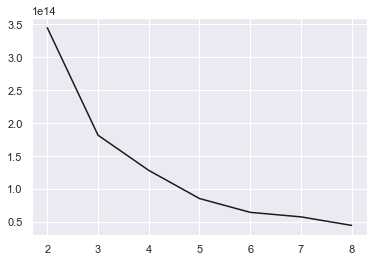

In [86]:
plt.plot(n_clusters,costs,'k')

In [ ]:
#It was found that clustering with 5 elements makes sense

In [87]:




#Pre-processing
for c in df_merge_col2.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

categorical_columns = [0, 2, 3, 4, 5, 7] #make sure to specify correct indices

#Actual clustering
kproto = KPrototypes(n_clusters= 5, init='Cao', n_jobs = 4)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

#Prints the count of each cluster group
pd.Series(clusters).value_counts()

1    80456
2    55872
4    45248
3    35996
0    19075
dtype: int64

In [ ]:
# Clusters are examined with the help of tableau and the result is supported by hypotheses 
#in detail in the word file.please check it 
#after that we are  making an easy nlp for the most valuable clustering

In [94]:
df_cluster = pd.DataFrame(clusters)

In [98]:
df_merge_collast=df_merge_col2.copy()

In [99]:
df_merge_collast['clusters'] = df_cluster[0].values

In [100]:
df_merge_collast.T

,0,1,2,3,4,5,6,7,8,9,...,245567,245568,245569,245570,245571,245572,245573,245574,245575,245576
SessionID,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,000b2e7db4bc51cb28e791c5df2e2335ed43912a,000b2e7db4bc51cb28e791c5df2e2335ed43912a,...,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435
Duration,0.056658,0.029212,39.22049,5.320609,39.241505,158.697815,159.556717,143.210205,0.255874,6.833619,...,2.45221,7.731539,11.01229,11.331903,12.690957,15.157271,15.796999,22.348804,22.562115,60.597107
ContentAction,UIApplicationLocationDidChange,FECLAuthorizationStatusChanged,Photo Selected,Gallery View,Table View,UIApplicationWillResignActiveNotification,UIApplicationDidEnterBackgroundNotification,Gallery View,FECLAuthorizationStatusChanged,Gallery View,...,Gallery View,Change Feed,Change Feed,UIApplicationDidReceiveMemoryWarningNotification,Change Feed,UIApplicationWillResignActiveNotification,UIApplicationDidEnterBackgroundNotification,UIApplicationDidReceiveMemoryWarningNotification,UIApplicationDidReceiveMemoryWarningNotification,UIApplicationDidBecomeActiveNotification
ContentDetail,Lat : 40.222765 / Lng : 40.222765,Authorized Always,Jessica Alba 2 cocuk annesi olmasina ragmen Me...,PageView,Jessica Alba 2 cocuk annesi olmasina ragmen Me...,,,PageView,Denied,PageView,...,PageView,,,,,,,,,
Action,,,,,UI Actions,,,,,,...,,Feed Actions,Feed Actions,,Feed Actions,,,,,
ActionDetail,,,,,Row Selected,,,,,,...,,Popular,Show Count,,New,,,,,
deviceType,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
deviceUDID,51BBB58A-532B-4E0C-BEA4-7B832FC2D6A9,51BBB58A-532B-4E0C-BEA4-7B832FC2D6A9,51BBB58A-532B-4E0C-BEA4-7B832FC2D6A9,51BBB58A-532B-4E0C-BEA4-7B832FC2D6A9,51BBB58A-532B-4E0C-BEA4-7B832FC2D6A9,51BBB58A-532B-4E0C-BEA4-7B832FC2D6A9,51BBB58A-532B-4E0C-BEA4-7B832FC2D6A9,51BBB58A-532B-4E0C-BEA4-7B832FC2D6A9,B17A1D2C-EB0A-4535-93F9-79A4983C353D,B17A1D2C-EB0A-4535-93F9-79A4983C353D,...,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2
isSessionFinished,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
durationInSeconds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df_merge_collast.clusters.nunique()

5

In [106]:
df__search2=df_merge_collast.loc[df_merge_collast['clusters'] == 2]


In [107]:
df__search2.T

,84,85,86,87,88,100,101,102,103,104,...,245567,245568,245569,245570,245571,245572,245573,245574,245575,245576
SessionID,0010a9c98bd04f1f784bc5eda4214cd44f8422f0,0010a9c98bd04f1f784bc5eda4214cd44f8422f0,0010a9c98bd04f1f784bc5eda4214cd44f8422f0,0010a9c98bd04f1f784bc5eda4214cd44f8422f0,0010a9c98bd04f1f784bc5eda4214cd44f8422f0,00253640f8fa134235a685b737827328b5ffb466,00253640f8fa134235a685b737827328b5ffb466,00253640f8fa134235a685b737827328b5ffb466,00253640f8fa134235a685b737827328b5ffb466,0025645426f42d64b5f8da1ab13a0a4ef09a44e5,...,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435,fffec04703adf9db138df32c9d2e413a50266435
Duration,0.14647,0.214881,5.971052,7.867702,7.964082,22.606657,22.537291,22.537472,22.597614,0.116985,...,2.45221,7.731539,11.01229,11.331903,12.690957,15.157271,15.796999,22.348804,22.562115,60.597107
ContentAction,FECLAuthorizationStatusChanged,UIApplicationLocationDidChange,Gallery View,UIApplicationWillResignActiveNotification,UIApplicationDidEnterBackgroundNotification,UIApplicationDidEnterBackgroundNotification,UIApplicationWillResignActiveNotification,UIApplicationWillResignActiveNotification,UIApplicationDidEnterBackgroundNotification,FECLAuthorizationStatusChanged,...,Gallery View,Change Feed,Change Feed,UIApplicationDidReceiveMemoryWarningNotification,Change Feed,UIApplicationWillResignActiveNotification,UIApplicationDidEnterBackgroundNotification,UIApplicationDidReceiveMemoryWarningNotification,UIApplicationDidReceiveMemoryWarningNotification,UIApplicationDidBecomeActiveNotification
ContentDetail,Authorized Always,Lat : 41.064695 / Lng : 41.064695,PageView,,,,,,,Denied,...,PageView,,,,,,,,,
Action,,,,,,,,,,,...,,Feed Actions,Feed Actions,,Feed Actions,,,,,
ActionDetail,,,,,,,,,,,...,,Popular,Show Count,,New,,,,,
deviceType,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
deviceUDID,301F9CF3-967F-41CC-B035-B407A891855E,301F9CF3-967F-41CC-B035-B407A891855E,301F9CF3-967F-41CC-B035-B407A891855E,301F9CF3-967F-41CC-B035-B407A891855E,301F9CF3-967F-41CC-B035-B407A891855E,17BA22F5-1C94-4014-AE30-A7A44EB06FE3,17BA22F5-1C94-4014-AE30-A7A44EB06FE3,17BA22F5-1C94-4014-AE30-A7A44EB06FE3,17BA22F5-1C94-4014-AE30-A7A44EB06FE3,36014A70-3F8A-4293-8B36-BA3346E2A222,...,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2,830E0D87-D325-49D0-9F5A-7952F38A9DB2
isSessionFinished,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
durationInSeconds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
df__search2['ContentDetail'].head(50)

84                                     Authorized Always
85                     Lat : 41.064695 / Lng : 41.064695
86                                              PageView
87                                                      
88                                                      
100                                                     
101                                                     
102                                                     
103                                                     
104                                               Denied
105                                                     
106                                             PageView
107                                                     
108                                                     
109                                             PageView
180                                       Not Determined
181                                                     
182                            

In [119]:
data1['ContentDetail'] = df__search2['ContentDetail']

In [120]:
data1

,UserLogID,SessionID,StopTime,StartTime,Duration,ContentAction,ContentDetail,ActionCode,Action,ActionDetail,ContentActionCode,ContentDetailCode
0,69234277,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,2015-01-11 21:01:47,2015-01-11 20:59:39,0.056658,UIApplicationLocationDidChange,NaN,7000,,,0,0
1,69234288,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,2015-01-11 21:01:47,2015-01-11 20:59:39,0.029212,FECLAuthorizationStatusChanged,NaN,7001,,,1,1
2,69234296,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,2015-01-11 21:01:48,2015-01-11 21:00:18,39.220490,Photo Selected,NaN,1000,,,2,2
3,69234311,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,2015-01-11 21:01:48,2015-01-11 20:59:44,5.320609,Gallery View,NaN,8000,,,3,3
4,69234315,0007dc0803c76ee3304a651723a1b0f4cf3f1ff3,2015-01-11 21:01:48,2015-01-11 21:00:18,39.241505,Table View,NaN,9000,UI Actions,Row Selected,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
260307,33530974,fffec04703adf9db138df32c9d2e413a50266435,2014-12-06 14:16:21,2014-12-06 14:16:21,15.157271,UIApplicationWillResignActiveNotification,NaN,3004,,,5,4
260308,33530976,fffec04703adf9db138df32c9d2e413a50266435,2014-12-06 14:16:22,2014-12-06 14:16:22,15.796999,UIApplicationDidEnterBackgroundNotification,NaN,3001,,,6,4
260309,33530997,fffec04703adf9db138df32c9d2e413a50266435,2014-12-06 14:16:28,2014-12-06 14:16:28,22.348804,UIApplicationDidReceiveMemoryWarningNotification,NaN,3003,,,7,4
260310,33530998,fffec04703adf9db138df32c9d2e413a50266435,2014-12-06 14:16:28,2014-12-06 14:16:29,22.562115,UIApplicationDidReceiveMemoryWarningNotification,NaN,3003,,,7,4


In [123]:
number_column = df__search2['ContentDetail']

In [124]:
number_column

84                        Authorized Always
85        Lat : 41.064695 / Lng : 41.064695
86                                 PageView
87                                         
88                                         
                        ...                
245572                                     
245573                                     
245574                                     
245575                                     
245576                                     
Name: ContentDetail, Length: 55872, dtype: object

In [125]:
texts = number_column.values

In [128]:
texts

array(['Authorized Always', 'Lat : 41.064695 / Lng : 41.064695',
       'PageView', ..., '', '', ''], dtype=object)

In [129]:
line_lengths = [len(sentence) for sentence in texts]

In [130]:
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt

(array([35459.,  2919.,  6630.,  2946.,  1803.,  1902.,  1892.,  1167.,
          987.,   167.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

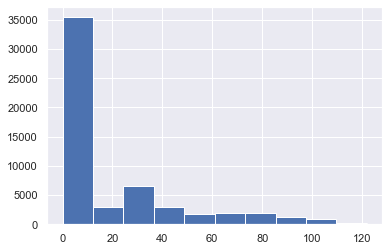

In [131]:
plt.hist(line_lengths)

In [132]:
 tokens = [item.split() for item in texts]

In [133]:
pip install tokenizer

     |████████████████████████████████| 78 kB 313 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [134]:
total_tokens_per_line = [len(sentence.split()) for sentence in texts]

(array([36198.,  3619.,  2499.,  4550.,  2947.,  2609.,  2187.,   627.,
          435.,   201.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

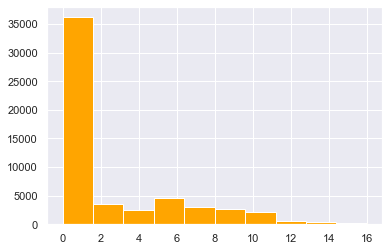

In [135]:
plt.hist(total_tokens_per_line, color='orange')

In [136]:

words = [word for sentence in tokens for word in sentence]


In [137]:
print(words)

['Authorized', 'Always', 'Lat', ':', '41.064695', '/', 'Lng', ':', '41.064695', 'PageView', 'Denied', 'PageView', 'PageView', 'Not', 'Determined', 'Authorized', 'Always', 'Lat', ':', '41.043065', '/', 'Lng', ':', '41.043065', 'PageView', 'Unlu', 'tasarimci', 'Kimberley', 'Garner', "Karayipler'de", 'Unlu', 'tasarimci', 'Kimberley', 'Garner', "Karayipler'de", 'PageView', 'Bethenny', 'Frankel', 've', 'erkek', 'arkadasi', 'Michael', 'Cerussi', 'yeni', 'yila', 'Miami', 'plajlarinda', 'girdi.', 'Bethenny', 'Frankel', 've', 'erkek', 'arkadasi', 'Michael', 'Cerussi', 'yeni', 'yila', 'Miami', 'plajlarinda', 'girdi.', 'Not', 'Determined', 'Authorized', 'Always', 'PageView', 'Denied', 'PageView', 'Not', 'Determined', "Facebook'ta", 'havlu', 'modasi!', "Facebook'ta", 'havlu', 'modasi!', 'PageView', 'http://d23icm3atkgbha.cloudfront.net/gazetevatan/1417951870/b62531a0-2f99-4c81-a7e4-1c80d249a851.jpg', 'Serenay', "Aktas'tan", 'futbol', 'show', 'Serenay', "Aktas'tan", 'futbol', 'show', 'Cicis', 'kard

In [138]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [139]:

words = list(filter(None, [re.sub(r'[^A-Za-z]', " ", word) for word in words]))


In [140]:
words = [item.split() for item in words]

In [141]:
words = [word for sentence in words for word in sentence]

In [142]:
from collections import Counter

In [143]:
words = [word.lower() for word in words]

In [144]:
words

['authorized',
 'always',
 'lat',
 'lng',
 'pageview',
 'denied',
 'pageview',
 'pageview',
 'not',
 'determined',
 'authorized',
 'always',
 'lat',
 'lng',
 'pageview',
 'unlu',
 'tasarimci',
 'kimberley',
 'garner',
 'karayipler',
 'de',
 'unlu',
 'tasarimci',
 'kimberley',
 'garner',
 'karayipler',
 'de',
 'pageview',
 'bethenny',
 'frankel',
 've',
 'erkek',
 'arkadasi',
 'michael',
 'cerussi',
 'yeni',
 'yila',
 'miami',
 'plajlarinda',
 'girdi',
 'bethenny',
 'frankel',
 've',
 'erkek',
 'arkadasi',
 'michael',
 'cerussi',
 'yeni',
 'yila',
 'miami',
 'plajlarinda',
 'girdi',
 'not',
 'determined',
 'authorized',
 'always',
 'pageview',
 'denied',
 'pageview',
 'not',
 'determined',
 'facebook',
 'ta',
 'havlu',
 'modasi',
 'facebook',
 'ta',
 'havlu',
 'modasi',
 'pageview',
 'http',
 'd',
 'icm',
 'atkgbha',
 'cloudfront',
 'net',
 'gazetevatan',
 'b',
 'a',
 'f',
 'c',
 'a',
 'e',
 'c',
 'd',
 'a',
 'jpg',
 'serenay',
 'aktas',
 'tan',
 'futbol',
 'show',
 'serenay',
 'aktas',

In [172]:
mystopwords = ['nan','d','lat','lng','denied','authorized','always','g','authorized','yeni','i','hhtp'
               'pageview','ki','video','de','da','ve','bu','feed','type','nin','ya','in','ten','s','a','un',
              'b','bir','n','en','http','icm','atkgbha','icm','net','cloudfront','jpg',
              'icin','c','f','not','determined','son','y','k','r','alwyays','dan','t','kadar',
              'pageview','e','ile','olay','oldu','geliyor','nl','z','unlu','daha','yila','ye','lerin',
              'yine','ti','ler','ta','yle','m','l','g','ozel','verdi']

In [173]:
new_words = list(filter(lambda w: w not in mystopwords, words))

In [174]:
c = Counter(new_words)

In [175]:
c.most_common(200)

[('instagram', 1309),
 ('fotograflari', 606),
 ('seksi', 560),
 ('victoria', 430),
 ('secret', 412),
 ('gazetevatan', 410),
 ('serenay', 393),
 ('kardashian', 388),
 ('foto', 385),
 ('show', 363),
 ('raflar', 347),
 ('kamera', 338),
 ('selfie', 330),
 ('ebru', 321),
 ('valentina', 314),
 ('vignali', 314),
 ('basketbolu', 314),
 ('kate', 309),
 ('karsisina', 309),
 ('adnan', 306),
 ('oktar', 306),
 ('kim', 300),
 ('kedicigi', 292),
 ('kizi', 288),
 ('sosyal', 278),
 ('vuran', 278),
 ('upton', 277),
 ('kadin', 269),
 ('etti', 269),
 ('yilbasi', 264),
 ('moda', 264),
 ('model', 259),
 ('irina', 249),
 ('miami', 247),
 ('yildiz', 241),
 ('rusya', 239),
 ('damga', 238),
 ('kez', 236),
 ('yasindaki', 235),
 ('girdi', 234),
 ('facebook', 234),
 ('melekleri', 219),
 ('yapti', 218),
 ('sonra', 214),
 ('takvimi', 214),
 ('ne', 213),
 ('meksika', 212),
 ('esi', 203),
 ('simdi', 203),
 ('goruntuler', 202),
 ('dergisi', 202),
 ('kelly', 201),
 ('olmaya', 199),
 ('brook', 199),
 ('hollywood', 198),


In [176]:
unique_words = list(set([word for doc in [doc.split() for doc in new_words]
                         for word in doc]))
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['grill', 'petek', 'yesil', 'yolcu', 'reklami', 'yalnizligin', 'adc', 'gabi', 'alina', 'mesi', 'mckinney', 'gelir', 'esquire', 'yaptigi', 'hilton', 'ge', 'fotograflandi', 'salma', 'mahkum', 'seyven', 'tad', 'icloud', 'porn', 'aacb', 'ran', 'kul', 'balayi', 'yar', 'cfd', 'corver', 'servet', 'fbcf', 'beaf', 'ogretmen', 'kate', 'hande', 'taraf', 'cec', 'kafa', 'ba', 'walia', 'masrafina', 'modifiye', 'cefea', 'lenen', 'italya', 'ikarus', 'bulunmak', 'yay', 'tarafindan', 'dogus', 'aaeee', 'fotograf', 'xenia', 'saatlerde', 'chanelle', 'memurunun', 'asklari', 'dcfcab', 'universitesi', 'sinir', 'annabelle', 'sitriptizci', 'tropez', 'unlulerini', 'avustralya', 'bccec', 'brezilya', 'gucyetmez', 'moskova', 'birbirleriyle', 'gecelik', 'eden', 'belda', 'sudeikis', 'forma', 'haremi', 'modellik', 'kerslake', 'unutulmaz', 'bcde', 'veliahti', 'afeb', 'kumasci', 'yagmur', 'nina', 'malibu', 'sahnesine', 'krupa', 'gulme', 'ee', 'dirty', 'pesinde', 'hunt', 'imza', 'cekmek', 'gozluklu', 'unlu

In [177]:
from collections import Counter
# build bag of words features for each document - term frequencies
bow_features = []
for doc in new_words:
    bow_feature_doc = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature_doc.update(all_features)
    bow_features.append(bow_feature_doc)
bow_features = pd.DataFrame(bow_features)
bow_features

,tasarimci,grill,petek,yesil,yolcu,reklami,yalnizligin,adc,gabi,alina,...,adalari,raket,yildizi,cea,hayatlarina,konusmayi,slow,tahiti,tinder,talyanlar
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)
# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df # adding 1 to smoothen idf later
# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,tasarimci,grill,petek,yesil,yolcu,reklami,yalnizligin,adc,gabi,alina,...,adalari,raket,yildizi,cea,hayatlarina,konusmayi,slow,tahiti,tinder,talyanlar
0,79,37,3,23,8,45,11,6,48,7,...,32,2,56,4,33,23,61,105,2,28


In [179]:
# compute inverse document frequencies
total_docs = 1 + len(new_words)
idf = 1.0 + np.log(float(total_docs) / df)
# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)


,tasarimci,grill,petek,yesil,yolcu,reklami,yalnizligin,adc,gabi,alina,...,adalari,raket,yildizi,cea,hayatlarina,konusmayi,slow,tahiti,tinder,talyanlar
0,8.12,8.88,11.39,9.35,10.41,8.68,10.09,10.7,8.62,10.54,...,9.02,11.79,8.46,11.1,8.99,9.35,8.38,7.83,11.79,9.16


In [180]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()
# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,...,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800
0,8.12,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,0.00,8.88,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,11.39,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,9.35,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,10.41,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.35,0.00,0.00,0.00,0.00
2797,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,8.38,0.00,0.00,0.00
2798,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,7.83,0.00,0.00
2799,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,11.79,0.00


In [181]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,tasarimci,grill,petek,yesil,yolcu,reklami,yalnizligin,adc,gabi,alina,...,adalari,raket,yildizi,cea,hayatlarina,konusmayi,slow,tahiti,tinder,talyanlar
0,8.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97462,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97463,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97464,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97465,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:

from numpy.linalg import norm
# compute L2 norms
norms = norm(tfidf, axis=1)
# print norms for each document
print (np.round(norms, 3))



[8.118 8.081 8.081 ... 6.86  6.158 7.369]


In [183]:
# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]
# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,tasarimci,grill,petek,yesil,yolcu,reklami,yalnizligin,adc,gabi,alina,...,adalari,raket,yildizi,cea,hayatlarina,konusmayi,slow,tahiti,tinder,talyanlar
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
pip install numpy-linalg

     |████████████████████████████████| 5.4 MB 1.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for numpy-linalg: filename=numpy_linalg-0.1-py3-none-any.whl size=5171 sha256=fb504d85dbaf1123a44cb24f0dee2e0f2bcc86e2738669658055d437af5d5de5
  Stored in directory: /Users/barankaplan/Library/Caches/pip/wheels/1f/9b/14/b43c21cba1114f1cc5ccfa24b696241fbda2aed59a6aa9bfe2
  ERROR: Command errored out with exit status 1:
   command: /Users/barankaplan/opt/anaconda3/bin/python /Users/barankaplan/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/tmpxowyqtdm
       cwd: /private/var/folders/y6/v2wgz1dj55ddhqzgbk0_rtr40000gn/T/pip-install-5txqvkq4/numpy_92a1222300e345e9a327e78523b81315
  Complete output (349 lines):
  Running from numpy source directory.
  /private/var/folders/y6/v2wgz1dj55

In [185]:
pip install linalg

  Created wheel for linalg: filename=linalg-1.0.4-py3-none-any.whl size=6292 sha256=897b8c9866098c1d2492795a25760e5d409fef46407668bb728f87c13179bc2a
  Stored in directory: /Users/barankaplan/Library/Caches/pip/wheels/00/8b/7b/b7255e87ae100e85acc71af22550761bd41d97521e150f4e0e
Successfully built linalg
Note: you may need to restart the kernel to use updated packages.


In [186]:
from numpy import linalg as LA

In [187]:
from numpy.linalg import norm

In [188]:
pip install vectorize

  Created wheel for vectorize: filename=vectorize-0.2.0-py3-none-any.whl size=1965 sha256=110b490f19f4188aeeb2d31689a8ff891a92c9e78e8f1edb79203931ebb4e045
  Stored in directory: /Users/barankaplan/Library/Caches/pip/wheels/d1/27/17/1b3f86ab9855e76dec98ff4f4ec675da93c0383f90ae611346
Successfully built vectorize
Note: you may need to restart the kernel to use updated packages.


In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(new_words)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aa,aaa,aaacd,aab,aaba,aac,aacb,aace,aad,aae,...,zledim,zlem,zmek,zmeyi,zor,zorlamaya,zorunlu,zpirin,zt,zyilmazel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
new_doc = 'didem soydan  ivana sert  kelly brook  kate upton  claudia romani serenay jessica alba berrak anais zanotti '
query=pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),
             columns=tv.get_feature_names()).T

In [194]:
query[(query > 0).any(axis=1)]

,0
alba,0.27
anais,0.25
berrak,0.28
brook,0.24
claudia,0.24
didem,0.29
ivana,0.25
jessica,0.25
kate,0.22
kelly,0.23


In [195]:
from pandas import DataFrame

In [196]:
df = DataFrame (new_words,columns=['words'])

In [197]:
pip install wordcloud

     |████████████████████████████████| 220 kB 269 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=154234 sha256=0e2ebb6c52c739d2006c0539a48d4f97692f8acee14f8056d5d362e0f4558a94
  Stored in directory: /Users/barankaplan/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [198]:
from wordcloud import WordCloud 

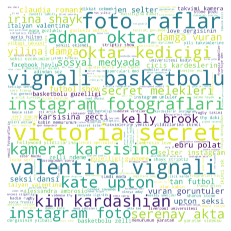

In [202]:
import nltk
from nltk.corpus import stopwords

wordcloud = WordCloud()
textt = " ".join(review for review in df.words)
wordcloud=WordCloud(background_color='white',mode="RGB", width=4000 , height=4000).generate(textt) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()